**DATA EXPLORATION**

---



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
import re
import os
%matplotlib inline

In [3]:
df_items = pd.read_csv("/content/drive/My Drive/Dataset/Lazada-20191002-items.csv")
df_items

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02
...,...,...,...,...,...,...,...,...,...
10937,9467887,shop-televisi-digital,"Toshiba 32L3750VJ Digital Tv DVB-T2 LED TV 32""...",Toshiba,https://www.lazada.co.id/products/toshiba-32l3...,1990000,4,12,2019-10-02
10938,9467898,shop-televisi-digital,Samsung 43K5002AK Televisi LED - Khusus JABODE...,Samsung,https://www.lazada.co.id/products/samsung-43k5...,4590000,1,1,2019-10-02
10939,9467899,shop-televisi-digital,"Sharp 32LE180i AQUOS LED TV 32 "" Khusus JABOD...",Sharp,https://www.lazada.co.id/products/sharp-32le18...,1990000,4,2,2019-10-02
10940,9548087,shop-televisi-digital,"Akari LED TV LE-50D88 50"" FULL HD (Hitam) - ...",Akari,https://www.lazada.co.id/products/akari-led-tv...,4790000,5,1,2019-10-02


In [4]:
df_reviews = pd.read_csv("/content/drive/My Drive/Dataset/Lazada-20191002-reviews.csv")
df_reviews

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02
203783,9467899,shop-televisi-digital,FIRLY B.,3,NaN,barang bagus dan sesuai pesanan,NaN,0,0,0,True,14.01,10 Apr 2018,androidApp,2019-10-02
203784,9548087,shop-televisi-digital,soni s.,5,NaN,NaN,NaN,0,0,0,True,15.63,04 Jan 2018,androidApp,2019-10-02
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02


In [5]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10942 non-null  int64 
 1   category       10942 non-null  object
 2   name           10942 non-null  object
 3   brandName      10940 non-null  object
 4   url            10942 non-null  object
 5   price          10942 non-null  int64 
 6   averageRating  10942 non-null  int64 
 7   totalReviews   10942 non-null  int64 
 8   retrievedDate  10942 non-null  object
dtypes: int64(4), object(5)
memory usage: 769.5+ KB


In [6]:
df_items.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [8]:
df_reviews.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,2.037870e+05,203787.000000,8.0,203787.000000,203787.000000,203787.000000,203787.000000
mean,2.836479e+08,4.603238,1.0,0.668634,0.668634,0.164638,25.097394
std,1.726207e+08,0.991164,0.0,12.192433,12.192433,2.013273,9.602434
min,6.068000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,0.960000
25%,1.600086e+08,5.000000,1.0,0.000000,0.000000,0.000000,18.010000
50%,3.541160e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
75%,4.147421e+08,5.000000,1.0,0.000000,0.000000,0.000000,29.670000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


**DATA CLEANING**

---



---



**1. Data cleaning untuk df_items**

In [9]:
df_items.head(10)

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02
5,100006860,beli-harddisk-eksternal,Sandisk Flashdisk Cruzer Glide CZ60 16GB + iRi...,SanDisk,https://www.lazada.co.id/products/sandisk-flas...,55800,4,2,2019-10-02
6,100007498,beli-harddisk-eksternal,Asus X407UB-BV187T Laptop Multimedia Murah I C...,Asus,https://www.lazada.co.id/products/asus-x407ub-...,8132000,5,2,2019-10-02
7,100010722,beli-harddisk-eksternal,"Philips 32PHA3052S/70 32"" Televisi LED (FREE B...",Philips,https://www.lazada.co.id/products/philips-32ph...,1990000,4,10,2019-10-02
8,100010745,beli-harddisk-eksternal,Philips 39PHA4251S/70 39' Televisi LED (FREE B...,Philips,https://www.lazada.co.id/products/philips-39ph...,3190000,4,7,2019-10-02
9,100015720,beli-harddisk-eksternal,Acer E5 575G-74E2 - Core i7-6500U - RAM 8GB DD...,Acer,https://www.lazada.co.id/products/acer-e5-575g...,8000000,3,8,2019-10-02


In [10]:
#Mencari tahu apakah dalam 1 item terdapat lebih dari 1 category

df_items[df_items['itemId'] == 100002528]

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
5123,100002528,beli-smart-tv,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
6413,100002528,jual-flash-drives,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02


In [11]:
#Menampilkan jumlah null values pada setiap kolom

pd.isnull(df_items).sum()

itemId           0
category         0
name             0
brandName        2
url              0
price            0
averageRating    0
totalReviews     0
retrievedDate    0
dtype: int64

In [12]:
#Menampilkan jumlah category untuk setiap category

df_items.category.value_counts()

beli-harddisk-eksternal    4422
jual-flash-drives          3318
beli-smart-tv              1290
shop-televisi-digital      1211
beli-laptop                 701
Name: category, dtype: int64

In [13]:
df_items.isnull()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10937,False,False,False,False,False,False,False,False,False
10938,False,False,False,False,False,False,False,False,False
10939,False,False,False,False,False,False,False,False,False
10940,False,False,False,False,False,False,False,False,False


In [14]:
df_items.columns

Index(['itemId', 'category', 'name', 'brandName', 'url', 'price',
       'averageRating', 'totalReviews', 'retrievedDate'],
      dtype='object')

In [15]:
#Dibagi berdasarkan jumlah kategorinya.

In [16]:
#Melihat apakah setiap item memiliki satu kategory atau lebih
#Satu kategori

cat1 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 1))
df_items_cat1 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 1)
df_items_cat1.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
1488,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,765000,4,17,2019-10-02
1489,19949,beli-harddisk-eksternal,"WD Elements 2.5"" - 2 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,1088500,4,33,2019-10-02
3241,50409,beli-harddisk-eksternal,"Western Digital Elements 2.5"" USB 3.0 1 TB - H...",WD,https://www.lazada.co.id/products/western-digi...,925955,5,1,2019-10-02
3884,64523,beli-harddisk-eksternal,Sharkoon 5-Bay RAID Box Hard Disk Storage Arra...,Sharkoon,https://www.lazada.co.id/products/sharkoon-5-b...,3500000,5,1,2019-10-02
3897,64971,beli-harddisk-eksternal,﻿Seagate Harddisk Internal PC 320GB SATA,Seagate,https://www.lazada.co.id/products/seagate-hard...,190000,3,10,2019-10-02


In [17]:
#Menampilkan sampel data yang memiliki jumlah kategori = 1

print('Satu kategori :', cat1)
print(df_items_cat1.category.value_counts(), '\n')

Satu kategori : 1104
beli-harddisk-eksternal    1104
Name: category, dtype: int64 



In [18]:
#Melihat apakah setiap item memiliki dua kategory atau lebih
#Dua kategori

cat2 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 2))
df_items_cat2 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 2)
df_items_cat2.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
2861,44569,beli-harddisk-eksternal,EO TP Usb Hub 7P On Off Led - Putih,EO TP,https://www.lazada.co.id/products/eo-tp-usb-hu...,39400,5,2,2019-10-02
8395,44569,jual-flash-drives,EO TP Usb Hub 7P On Off Led - Putih,EO TP,https://www.lazada.co.id/products/eo-tp-usb-hu...,39400,5,2,2019-10-02
2880,45076,beli-harddisk-eksternal,Adata Flash Disk UV150 - 16gb - USB 3.0 - Hitam,Adata,https://www.lazada.co.id/products/adata-flash-...,79900,5,1,2019-10-02
8411,45076,jual-flash-drives,Adata Flash Disk UV150 - 16gb - USB 3.0 - Hitam,Adata,https://www.lazada.co.id/products/adata-flash-...,79900,5,1,2019-10-02
3140,49780,beli-harddisk-eksternal,Sandisk Cruzer Blade - 16 GB,SanDisk,https://www.lazada.co.id/products/sandisk-cruz...,46000,4,166,2019-10-02


In [19]:
#Menampilkan sampel data yang memiliki jumlah kategori = 2

print('Dua kategori :', cat2)
print(df_items_cat2.category.value_counts(), '\n')

Dua kategori : 4056
beli-harddisk-eksternal    2028
jual-flash-drives          2028
Name: category, dtype: int64 



In [20]:
#Melihat apakah setiap item memiliki tiga kategory atau lebih
#Tiga kategori

cat3 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 3))
df_items_cat3 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 3)
df_items_cat3.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
4332,857971,beli-harddisk-eksternal,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
6393,857971,beli-smart-tv,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
9673,857971,jual-flash-drives,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
1456,1917900,beli-harddisk-eksternal,"LG 42"" Full HD 3D Smart TV - Hitam - 42LA6200",LG,https://www.lazada.co.id/products/lg-42-full-h...,8499000,2,1,2019-10-02
5524,1917900,beli-smart-tv,"LG 42"" Full HD 3D Smart TV - Hitam - 42LA6200",LG,https://www.lazada.co.id/products/lg-42-full-h...,8499000,2,1,2019-10-02


In [21]:
#Menampilkan sampel data yang memiliki jumlah kategori = 3

print('Tiga kategori :', cat3)
print(df_items_cat3.category.value_counts(), '\n')

Tiga kategori : 237
beli-harddisk-eksternal    79
beli-smart-tv              79
jual-flash-drives          79
Name: category, dtype: int64 



In [22]:
#Melihat apakah setiap item memiliki empat kategory atau lebih
#Empat kategori

cat4 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 4))
df_items_cat4 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 4)
df_items_cat4.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
1586,25844,beli-harddisk-eksternal,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
5548,25844,beli-smart-tv,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
7365,25844,jual-flash-drives,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
10140,25844,shop-televisi-digital,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
1587,25850,beli-harddisk-eksternal,"CRYSTAL LED TV 24"" Imagine CTV-2924",Crystal,https://www.lazada.co.id/products/crystal-led-...,2450000,3,1,2019-10-02


In [23]:
#Menampilkan sampel data yang memiliki jumlah kategori = 4

print('Empat kategori :', cat4)
print(df_items_cat4.category.value_counts(), '\n')

Empat kategori : 2040
beli-harddisk-eksternal    510
beli-smart-tv              510
jual-flash-drives          510
shop-televisi-digital      510
Name: category, dtype: int64 



In [24]:
#Melihat apakah setiap item memiliki Lima kategory atau lebih
#Lima kategori

cat5 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 5))
df_items_cat5 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 5)
df_items_cat5.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
3741,6068,beli-harddisk-eksternal,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
5040,6068,beli-laptop,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
6258,6068,beli-smart-tv,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
9168,6068,jual-flash-drives,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
10798,6068,shop-televisi-digital,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02


In [25]:
#Menampilkan sampel data yang memiliki jumlah kategori = 5

print('Lima kategori :', cat5)
print(df_items_cat5.category.value_counts(), '\n')

Lima kategori : 3505
beli-harddisk-eksternal    701
beli-laptop                701
beli-smart-tv              701
jual-flash-drives          701
shop-televisi-digital      701
Name: category, dtype: int64 



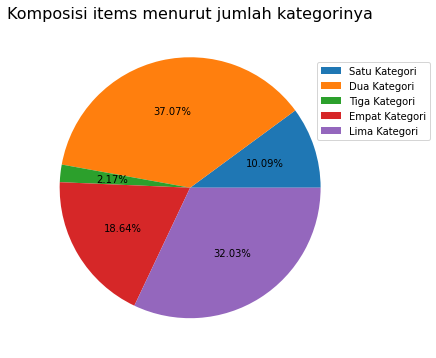

In [26]:
#Visualisasi piecat

cat = np.array([cat1, cat2, cat3, cat4, cat5])
cat_percentile = []
for i in cat:
    x = i/np.sum(cat)
    cat_percentile.append(x)
     

fig, ax = plt.subplots(figsize = (8, 6))

labels = ['Satu Kategori', 'Dua Kategori', 'Tiga Kategori', 'Empat Kategori', 'Lima Kategori']
ax.pie(x = cat_percentile,
       autopct = '%1.2f%%')
ax.set_title(label = 'Komposisi items menurut jumlah kategorinya', size = 16)
ax.legend(labels, loc = 'upper right', bbox_to_anchor=(1.25, 0.9))
plt.show()

In [27]:
#Mengeliminasi baris yang memiliki nilai duplikat
#Hasil yang diinginkan berupa setiap item hanya memiliki satu kategori spesifik berdasarkan dataframe yang sudah dibagi berdasarkan jumlah kategorinya.

In [28]:
#Kategori 1
print(df_items_cat1.category.value_counts(),'\n')

#Kategori 2
df_items_cat2 = df_items_cat2[df_items_cat2['category'] == 'jual-flash-drives']
print(df_items_cat2.category.value_counts(),'\n')

#Kategori 3
df_items_cat3 = df_items_cat3[df_items_cat3['category'] == 'beli-smart-tv']
print(df_items_cat3.category.value_counts(),'\n')

#Kategori 4
df_items_cat4 = df_items_cat4[df_items_cat4['category'] == 'shop-televisi-digital']
print(df_items_cat4.category.value_counts(),'\n')

#Kategori 5
df_items_cat5 = df_items_cat5[df_items_cat5['category'] == 'beli-laptop']
print(df_items_cat5.category.value_counts())

beli-harddisk-eksternal    1104
Name: category, dtype: int64 

jual-flash-drives    2028
Name: category, dtype: int64 

beli-smart-tv    79
Name: category, dtype: int64 

shop-televisi-digital    510
Name: category, dtype: int64 

beli-laptop    701
Name: category, dtype: int64


In [29]:
#Menggabungkan dataframe

df_items_clean = pd.concat([df_items_cat1, df_items_cat2, df_items_cat3, df_items_cat4, df_items_cat5],
                          axis = 0)
df_items_clean.reset_index(drop= True, inplace = True)
print(df_items_clean.info(), '\n')
print(df_items_clean.category.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         4422 non-null   int64 
 1   category       4422 non-null   object
 2   name           4422 non-null   object
 3   brandName      4420 non-null   object
 4   url            4422 non-null   object
 5   price          4422 non-null   int64 
 6   averageRating  4422 non-null   int64 
 7   totalReviews   4422 non-null   int64 
 8   retrievedDate  4422 non-null   object
dtypes: int64(4), object(5)
memory usage: 311.0+ KB
None 

jual-flash-drives          2028
beli-harddisk-eksternal    1104
beli-laptop                 701
shop-televisi-digital       510
beli-smart-tv                79
Name: category, dtype: int64


In [30]:
#Menampilkan baris dengan brandName null
df_items_clean[df_items_clean['brandName'].isnull()]

#Mengganti brandName yang null menjadi WD
df_items_clean.brandName.fillna('WD', inplace = True)

#Menghapus kolom retrievedDate
df_items_clean = df_items_clean.drop('retrievedDate', axis = 1)

print(df_items_clean.info(), '\n')
print(df_items_clean.category.value_counts(), '\n')
df_items_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         4422 non-null   int64 
 1   category       4422 non-null   object
 2   name           4422 non-null   object
 3   brandName      4422 non-null   object
 4   url            4422 non-null   object
 5   price          4422 non-null   int64 
 6   averageRating  4422 non-null   int64 
 7   totalReviews   4422 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 276.5+ KB
None 

jual-flash-drives          2028
beli-harddisk-eksternal    1104
beli-laptop                 701
shop-televisi-digital       510
beli-smart-tv                79
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,765000,4,17
1,19949,beli-harddisk-eksternal,"WD Elements 2.5"" - 2 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,1088500,4,33
2,50409,beli-harddisk-eksternal,"Western Digital Elements 2.5"" USB 3.0 1 TB - H...",WD,https://www.lazada.co.id/products/western-digi...,925955,5,1
3,64523,beli-harddisk-eksternal,Sharkoon 5-Bay RAID Box Hard Disk Storage Arra...,Sharkoon,https://www.lazada.co.id/products/sharkoon-5-b...,3500000,5,1
4,64971,beli-harddisk-eksternal,﻿Seagate Harddisk Internal PC 320GB SATA,Seagate,https://www.lazada.co.id/products/seagate-hard...,190000,3,10


**2. Data cleaning untuk data df_reviews**



In [31]:
df_reviews.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,01 Mar 2017,mobile,2019-10-02


In [32]:
#Menampilkan jumlah null values pada setiap kolom

pd.isnull(df_reviews).sum()

itemId                 0
category               0
name                   0
rating                 0
originalRating    203779
reviewTitle       180383
reviewContent      96758
likeCount              0
upVotes                0
downVotes              0
helpful                0
relevanceScore         0
boughtDate          7107
clientType             0
retrievedDate          0
dtype: int64

In [33]:
#Menampilkan jumlah category untuk setiap category

df_reviews.category.value_counts()

beli-harddisk-eksternal    82223
jual-flash-drives          64754
beli-smart-tv              29765
shop-televisi-digital      21264
beli-laptop                 5781
Name: category, dtype: int64

In [34]:
#Menampilkan jumlah category untuk setiap category

df_reviews.category.value_counts()

beli-harddisk-eksternal    82223
jual-flash-drives          64754
beli-smart-tv              29765
shop-televisi-digital      21264
beli-laptop                 5781
Name: category, dtype: int64

In [35]:
df_reviews.isnull()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
203783,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
203784,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
203785,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [36]:
df_reviews.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [37]:
#Menampilkan julah null values pada setiap kolom

df_reviews[df_reviews['itemId'] == 100002528]

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
88004,100002528,beli-smart-tv,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
88005,100002528,beli-smart-tv,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02


In [38]:
df_reviews_clean = df_reviews[df_reviews.set_index(['itemId', 'category']).index.isin(df_items_clean.set_index(['itemId', 'category']).index)]
print(df_reviews_clean.shape, '\n')
df_reviews_clean.head()

(82190, 15) 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
61,100027329,beli-harddisk-eksternal,Yoga T.,5,NaN,Sesuai Dengan yang tertera,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d...",2,2,0,True,23.30,02 Mei 2017,desktop,2019-10-02
62,100027329,beli-harddisk-eksternal,Heri K.,5,NaN,mantap,barang sesuai dengan gambar,0,0,0,True,20.21,20 Jun 2017,desktop,2019-10-02
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,NaN,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,1,0,True,19.99,NaN,mobile-app,2019-10-02
68,100028438,beli-harddisk-eksternal,Dimas D.,5,NaN,Kepuasan & Ketidakpuasan,"Saya sangat puas dengan barang.nya, kualitas b...",0,0,0,True,27.00,25 Feb 2017,mobile-app,2019-10-02
69,100028438,beli-harddisk-eksternal,Pembeli,4,NaN,Bagus,Barang diterima dengan kondisi yang baik tapi ...,0,0,0,True,20.51,19 Des 2017,iosApp,2019-10-02


In [39]:
#Eliminasi duplikat
df_reviews_clean = df_reviews[df_reviews.set_index(['itemId', 'category']).index.isin(df_items_clean.set_index(['itemId', 'category']).index)]

print(df_reviews_clean.shape, '\n')
df_reviews_clean.head()

(82190, 15) 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
61,100027329,beli-harddisk-eksternal,Yoga T.,5,NaN,Sesuai Dengan yang tertera,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d...",2,2,0,True,23.30,02 Mei 2017,desktop,2019-10-02
62,100027329,beli-harddisk-eksternal,Heri K.,5,NaN,mantap,barang sesuai dengan gambar,0,0,0,True,20.21,20 Jun 2017,desktop,2019-10-02
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,NaN,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,1,0,True,19.99,NaN,mobile-app,2019-10-02
68,100028438,beli-harddisk-eksternal,Dimas D.,5,NaN,Kepuasan & Ketidakpuasan,"Saya sangat puas dengan barang.nya, kualitas b...",0,0,0,True,27.00,25 Feb 2017,mobile-app,2019-10-02
69,100028438,beli-harddisk-eksternal,Pembeli,4,NaN,Bagus,Barang diterima dengan kondisi yang baik tapi ...,0,0,0,True,20.51,19 Des 2017,iosApp,2019-10-02


In [40]:
x = df_items_clean[df_items_clean['itemId'] == 100002528]
print(len(df_reviews_clean[df_reviews_clean['itemId'] == 100002528]))
y = df_reviews_clean[df_reviews_clean['itemId'] == 100002528]

#Mengecek apakah total review dari salah satu item sesuai dengan jumlah baris reviewnya
if x.totalReviews.item() == len(y):
    print(True)
else:
    print(False)

8
True


In [41]:
#Mengecek apakah kolom likeCount dan upVotes memiliki nilai yang sama
print(df_reviews_clean.likeCount.equals(df_reviews_clean.upVotes))

True


In [42]:
#Mengeliminasi kolom originalRating, likeCount, retrievedDate
df_reviews_clean = df_reviews_clean.drop(columns=['originalRating', 'likeCount', 'retrievedDate'])
df_reviews_clean.head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
61,100027329,beli-harddisk-eksternal,Yoga T.,5,Sesuai Dengan yang tertera,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d...",2,0,True,23.30,02 Mei 2017,desktop
62,100027329,beli-harddisk-eksternal,Heri K.,5,mantap,barang sesuai dengan gambar,0,0,True,20.21,20 Jun 2017,desktop
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,0,True,19.99,NaN,mobile-app
68,100028438,beli-harddisk-eksternal,Dimas D.,5,Kepuasan & Ketidakpuasan,"Saya sangat puas dengan barang.nya, kualitas b...",0,0,True,27.00,25 Feb 2017,mobile-app
69,100028438,beli-harddisk-eksternal,Pembeli,4,Bagus,Barang diterima dengan kondisi yang baik tapi ...,0,0,True,20.51,19 Des 2017,iosApp


In [42]:
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

#Mengganti nilai NaN
df_reviews_clean.reviewTitle.fillna('Tanpa Judul', inplace = True)
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

Jumlah NaN value pada reviewTitle :  71847
Jumlah NaN value pada reviewTitle :  0


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
df_reviews_clean[df_reviews_clean.boughtDate.isna() == True].head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,NaN,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,1,0,True,19.99,NaN,mobile-app,2019-10-02
70,100028438,beli-harddisk-eksternal,KHAIRUNNISA.SYAN,5,NaN,SESUIA DENGAN FOTO,"Suka banget sama barangnya packing nya rapi, p...",0,0,0,True,17.55,NaN,mobile-app,2019-10-02
431,100169437,beli-harddisk-eksternal,Kusnadi,5,NaN,WD My passport 1TB,Mantab.... Reseller nya... Pengiriman cepat da...,0,0,0,True,17.56,NaN,mobile-app,2019-10-02
631,100580784,beli-harddisk-eksternal,Fitria W.,5,NaN,Makasih kak,Tengkyuu.... Barangnya nyampe tepat waktu.... ...,0,0,0,True,10.18,NaN,mobile-app,2019-10-02
637,100582501,beli-harddisk-eksternal,harry d.,5,NaN,GOOD,"Jum'at pesan besoknya nyampai, Barang bagus, ...",0,0,0,True,10.13,NaN,mobile-app,2019-10-02


3. df_merged (Merged DataFrame)

Menggabungkan kedua data yaitu df_items_clean dan df_reviews_clean menjadi satu

In [44]:
#Menggabungkan dataframe
df_merged = pd.merge(df_items_clean, df_reviews_clean, left_on='itemId', right_on='itemId')\
                    .drop(['category_y', 'helpful', 'url'], axis = 1)\
                    .rename(columns = {'name_y' : 'reviewer',
                                       'name_x' : 'name',
                                       'category_x' : 'category'})
                                       
print(df_merged.shape)
df_merged.head()

(82190, 19)


,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Wandi S.,5,NaN,Tanpa Judul,"packing nya rapih, udah sya coba lancar.. smog...",0,0,0,29.51,19 Des 2018,androidApp,2019-10-02
1,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,5,NaN,Tanpa Judul,Biar bintang yang bicara,0,0,0,25.51,17 Apr 2017,androidApp,2019-10-02
2,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,4,NaN,Tanpa Judul,"Pengiriman sangat cepat, paket dan barang sang...",0,0,0,24.51,05 Agu 2017,androidApp,2019-10-02
3,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Chaerul U.,5,NaN,Tanpa Judul,produk yang sesuai pesanan. pembeli yang ramah,0,0,0,23.50,12 Des 2017,androidApp,2019-10-02
4,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Hendra P.,5,NaN,Tanpa Judul,NaN,0,0,0,18.01,18 Jan 2016,androidApp,2019-10-02


**Visualisasi Data**

---



---



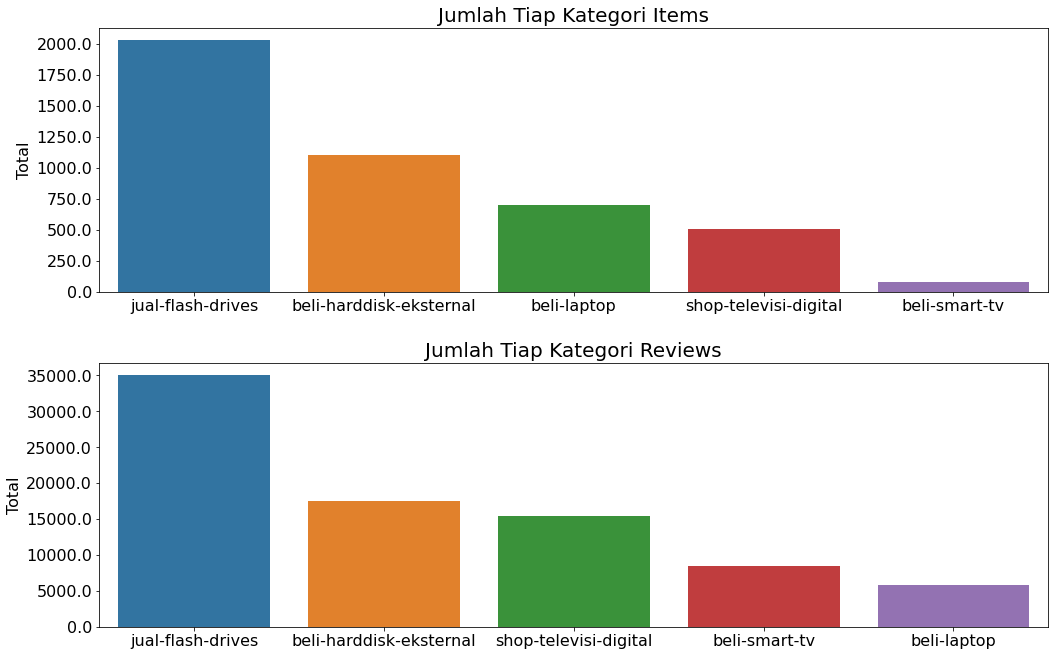

In [45]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
fig.tight_layout(pad = 5)

for ax, i, title in zip(ax.flatten(), [df_items_clean, df_reviews_clean], ['Items', 'Reviews']):
    #count = i.category.value_counts()
    index = i.category.value_counts().index
    
    sns.countplot(ax = ax, data = i, x = i.category, order = index)
    ax.set_title('Jumlah Tiap Kategori {}'.format(title), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(i.category.value_counts().index, fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('')
plt.show()

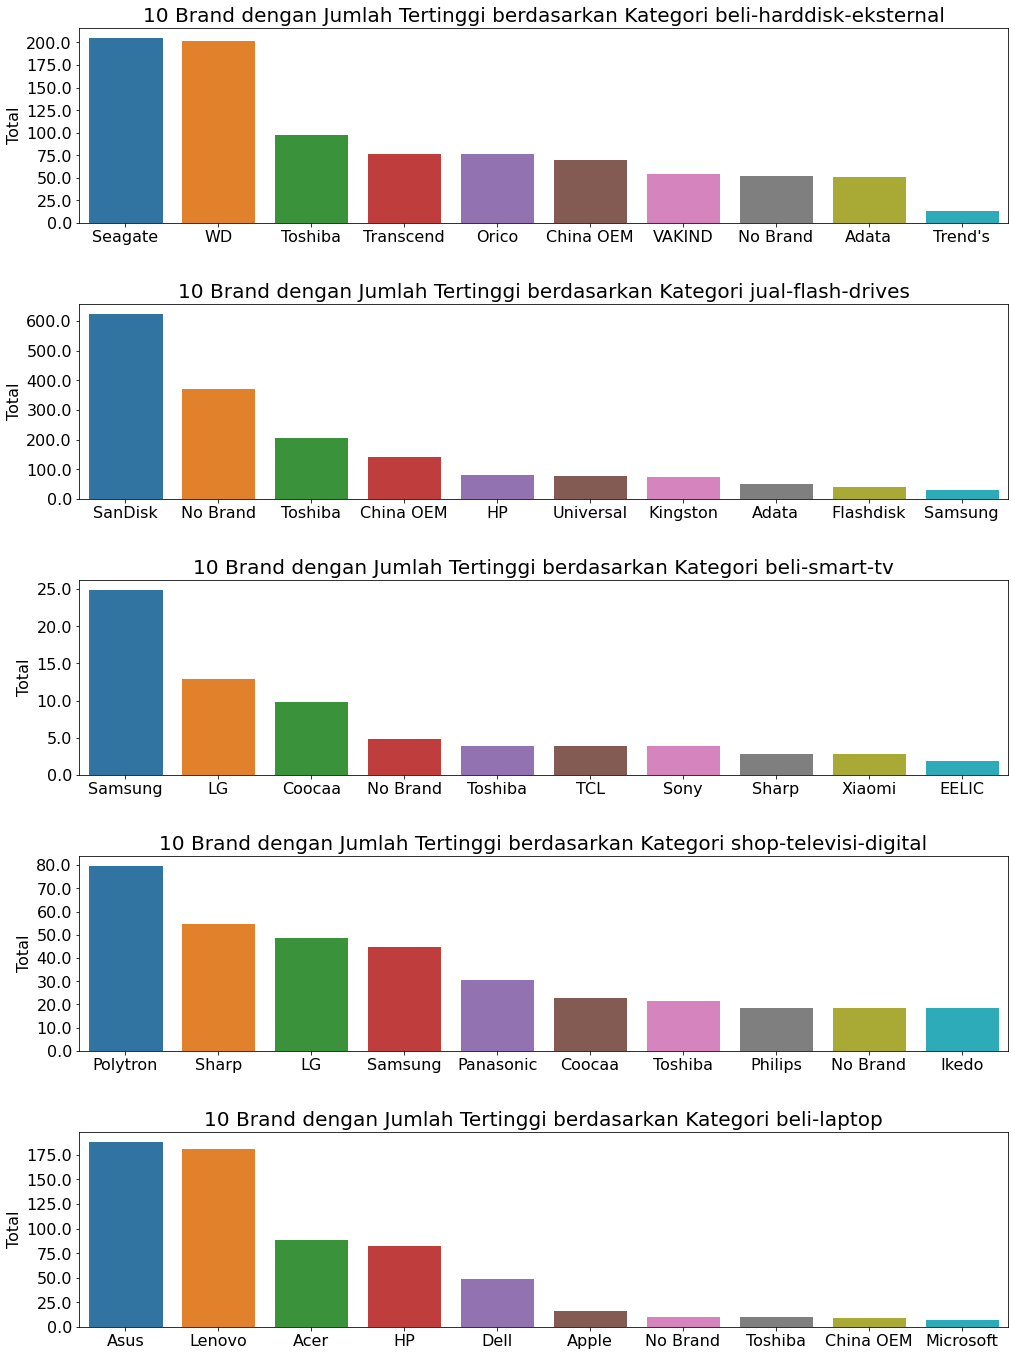

In [46]:
catlist = df_items_clean.category.unique()


fig, ax = plt.subplots(len(catlist), figsize = (15, 20))
fig.tight_layout(pad = 6)

for ax, i in zip(ax.flatten(), catlist):
    index = df_items_clean[df_items_clean['category'] == i]['brandName'].value_counts()
    
    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = df_items_clean, x = df_items_clean[df_items_clean['category'] == i]['brandName'], 
                  order = index.sort_values(ascending = False).index[:10])
    ax.set_title('10 Brand dengan Jumlah Tertinggi berdasarkan Kategori {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(index.sort_values(ascending = False).index[:10], fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('')
plt.show()

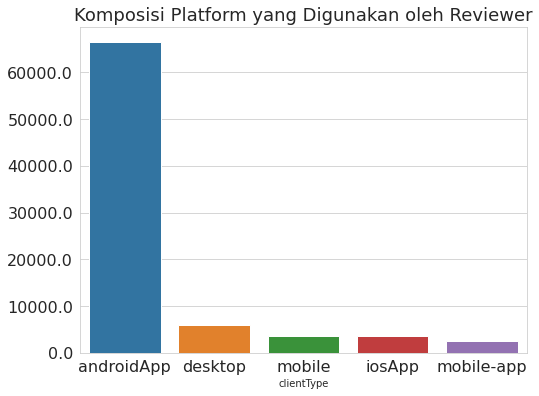

In [47]:
fig, ax = plt.subplots(figsize = (8, 6))

index = df_merged.clientType.value_counts().sort_values(ascending = False).index
sns.countplot(data = df_merged, x = 'clientType', order = index)
ax.set_title('Komposisi Platform yang Digunakan oleh Reviewer', fontsize = 18)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 16)
ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
plt.show()

In [48]:
#Format nilai besar
def large_tick_format(tick_value, pos):
    '''
    Mengubah tick yang memiliki nilai sangat besar(Miliar, Juta, Ribu) menjadi 
    B, M, K
    '''
    if tick_value >= 1000000000:
        value = round(tick_value/1000000000, 1)
        new_tick_format = '{:}B'.format(value)
    elif tick_value >= 1000000:
        value = round(tick_value/1000000, 1)
        new_tick_format = '{:}M'.format(value)
    elif tick_value >= 1000:
        new_tick_format = '{:}K'.format(value)
    elif tick_value < 1000:
        new_tick_format = round(tick_value, 1)
    else:
        new_tick_format = tick_value
    
    #Mengubah new_tick_format sebagai string
    new_tick_format = str(new_tick_format)
    
    #Mengubah contoh nilai 5.0 M agar menjadi 5 M
    decimal = new_tick_format.find('.')
    
    if decimal != -1:
        value_after_decimal = new_tick_format[decimal + 1]
        if value_after_decimal == '0':
            #menghapus 0 setelah desimal
            new_tick_format = new_tick_format[0:decimal] + new_tick_format[decimal + 2:]
    
    return new_tick_format

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; y

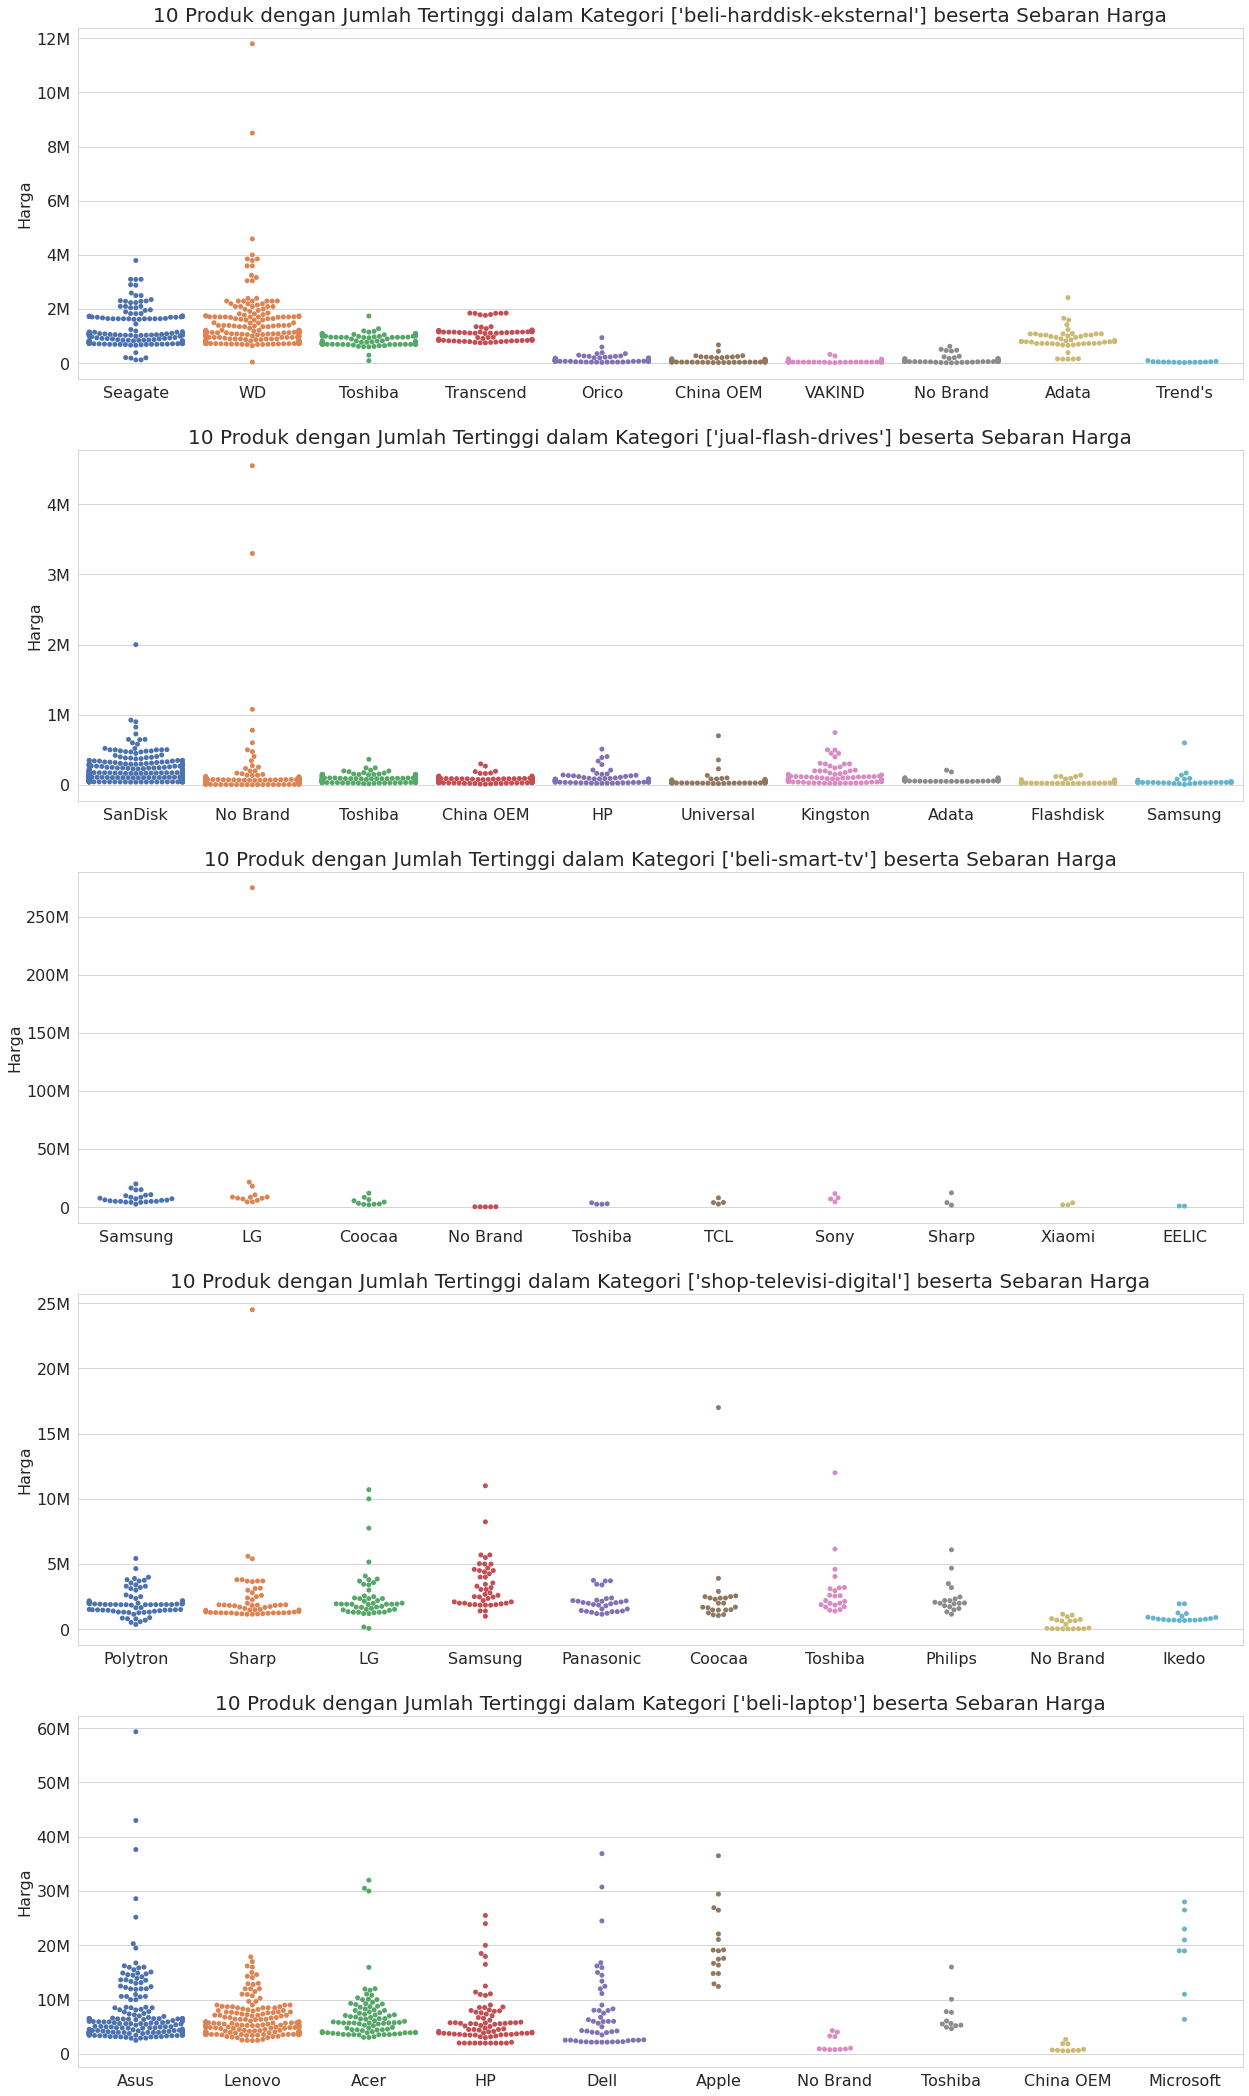

In [49]:
dfcat_list = [df_items_cat1, df_items_cat2, df_items_cat3, df_items_cat4, df_items_cat5]
cat = df_items_clean.category.unique()

fig, ax = plt.subplots(len(dfcat_list), figsize = (18, 30))
fig.tight_layout(pad = 5)
sns.set(font_scale = 1)

for ax, i in zip(ax.flatten(), dfcat_list):
    value = i.brandName.value_counts().sort_values(ascending = False).index[:10]
    x_data = i[i['brandName'].isin(value)]
    
    sns.swarmplot(ax = ax, data = x_data, x = x_data['brandName'], y = x_data['price'],
                order = value)
    ax.set_title('10 Produk dengan Jumlah Tertinggi dalam Kategori {} beserta Sebaran Harga'.format(i.category.unique()), fontsize = 20)
    ax.set_ylabel('Harga', fontsize = 16)
    ax.set_xlabel('')
    ax.set_xticklabels(value, size = 16)
    ax.set_yticklabels(ax.get_yticks(), size = 16)
    ax.yaxis.set_major_formatter(tick.FuncFormatter(large_tick_format))
     
plt.show()

Analisis Deret Waktu


Analisis deret waktu ini dilakukan untuk mendapatkan wawasan tentang tren pembelian dalam kurun waktu tertentu, baik berdasarkan kuantitas transaksi, maupun dari nilai total transaksi.

In [50]:
#Mengubah kolom boughtDate pada df_merged menjadi tipe data datetime
month = {'Jan': '01', 'Feb' : '02', 'Mar' : '03', 'Apr' : '04', 'Mei' : '05',
            'Jun' : '06', 'Jul' : '07', 'Agu' : '08', 'Sep' : '09', 'Okt' : '10', 'Nov' : '11', 'Des' : '12', ' ' : '-'}

df_merged.boughtDate.replace(month, regex = True, inplace = True)
df_merged.boughtDate = pd.to_datetime(df_merged.boughtDate, format='%d-%m-%Y')
df_merged.head()

,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Wandi S.,5,NaN,Tanpa Judul,"packing nya rapih, udah sya coba lancar.. smog...",0,0,0,29.51,2018-12-19,androidApp,2019-10-02
1,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,5,NaN,Tanpa Judul,Biar bintang yang bicara,0,0,0,25.51,2017-04-17,androidApp,2019-10-02
2,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,4,NaN,Tanpa Judul,"Pengiriman sangat cepat, paket dan barang sang...",0,0,0,24.51,2017-08-05,androidApp,2019-10-02
3,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Chaerul U.,5,NaN,Tanpa Judul,produk yang sesuai pesanan. pembeli yang ramah,0,0,0,23.50,2017-12-12,androidApp,2019-10-02
4,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Hendra P.,5,NaN,Tanpa Judul,NaN,0,0,0,18.01,2016-01-18,androidApp,2019-10-02


In [51]:
df_merged = df_merged.dropna(subset = ['boughtDate'], axis = 0)
df_merged[df_merged['boughtDate'].isna()]


,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate


In [52]:
#Membuat dataframe baru dengan kolom yang sudah dipilih

df_merged_ts = df_merged[['boughtDate', 'price']]
df_merged_ts = df_merged_ts.set_index('boughtDate')
df_merged_ts.sort_index(inplace = True)
df_merged_ts.head()

,price
boughtDate,
2014-04-19,2450000
2014-05-25,150000
2014-06-16,150000
2014-06-19,71000
2014-06-20,150000


In [53]:
#Membuat kolom baru = count
df_merged_ts.insert(column = 'count', value = 1, loc = 1)
print(df_merged_ts.shape)
df_merged_ts.head()

(79558, 2)


,price,count
boughtDate,,
2014-04-19,2450000,1
2014-05-25,150000,1
2014-06-16,150000,1
2014-06-19,71000,1
2014-06-20,150000,1


In [54]:
#Detail dateseries
df_merged_ts['year'] = df_merged_ts.index.year
df_merged_ts['month'] = df_merged_ts.index.month
df_merged_ts['dayname'] = df_merged_ts.index.day_name()

df_merged_ts.head()

,price,count,year,month,dayname
boughtDate,,,,,
2014-04-19,2450000,1,2014,4,Saturday
2014-05-25,150000,1,2014,5,Sunday
2014-06-16,150000,1,2014,6,Monday
2014-06-19,71000,1,2014,6,Thursday
2014-06-20,150000,1,2014,6,Friday


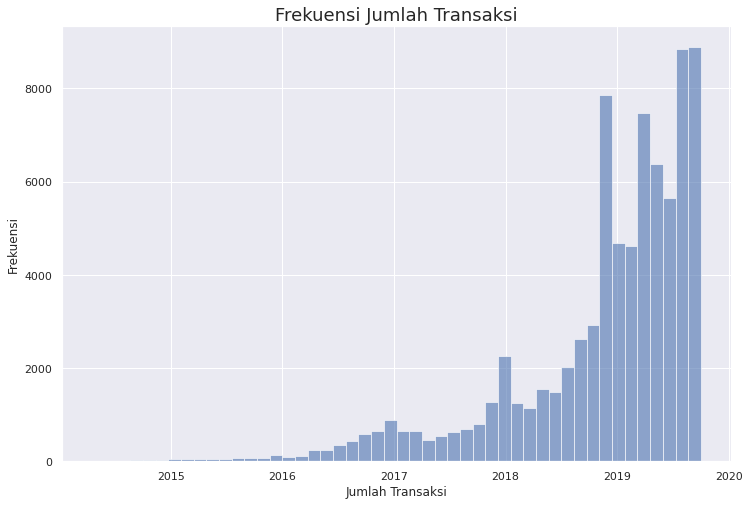

In [55]:
#Histogram count
plt.figure(figsize = (12, 8))

plt.hist(df_merged_ts.index, bins = 48, alpha = 0.6)
plt.title('Frekuensi Jumlah Transaksi', size = 18)
#plt.xlim('2014', '2019')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.show()

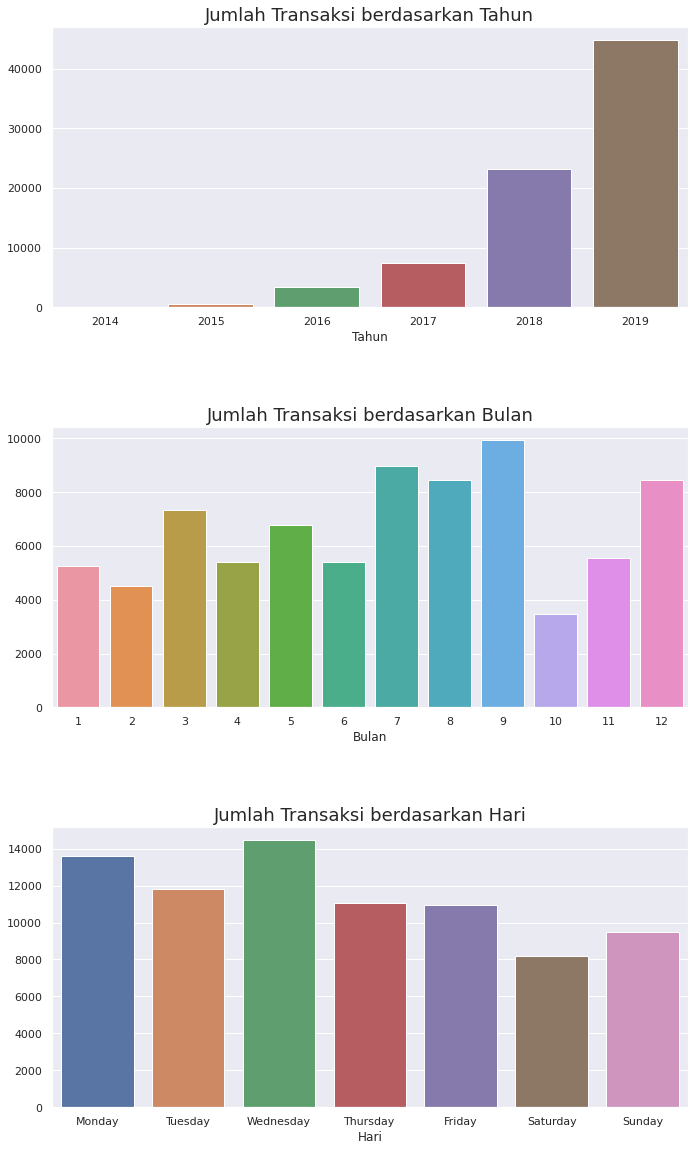

In [56]:
fig, ax = plt.subplots(3, 1, figsize = (12, 18))
fig.tight_layout(pad = 8)

sns.countplot(data = df_merged_ts, x = 'year', ax = ax[0])
ax[0].set_title('Jumlah Transaksi berdasarkan Tahun', size = 18)
ax[0].set_ylabel('')
ax[0].set_xlabel('Tahun')

sns.countplot(data = df_merged_ts, x = 'month', ax = ax[1])
ax[1].set_title('Jumlah Transaksi berdasarkan Bulan', size = 18)
ax[1].set_ylabel('')
ax[1].set_xlabel('Bulan')

sns.countplot(data = df_merged_ts, x = 'dayname', ax = ax[2], 
              order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax[2].set_title('Jumlah Transaksi berdasarkan Hari', size = 18)
ax[2].set_ylabel('')
ax[2].set_xlabel('Hari')

plt.show()

In [57]:
df_resampled = df_merged[['boughtDate']]
df_resampled.insert(column = 'count', value = 1, loc = 1)
df_resampled.head()
df_resampled = df_resampled.groupby('boughtDate').count()

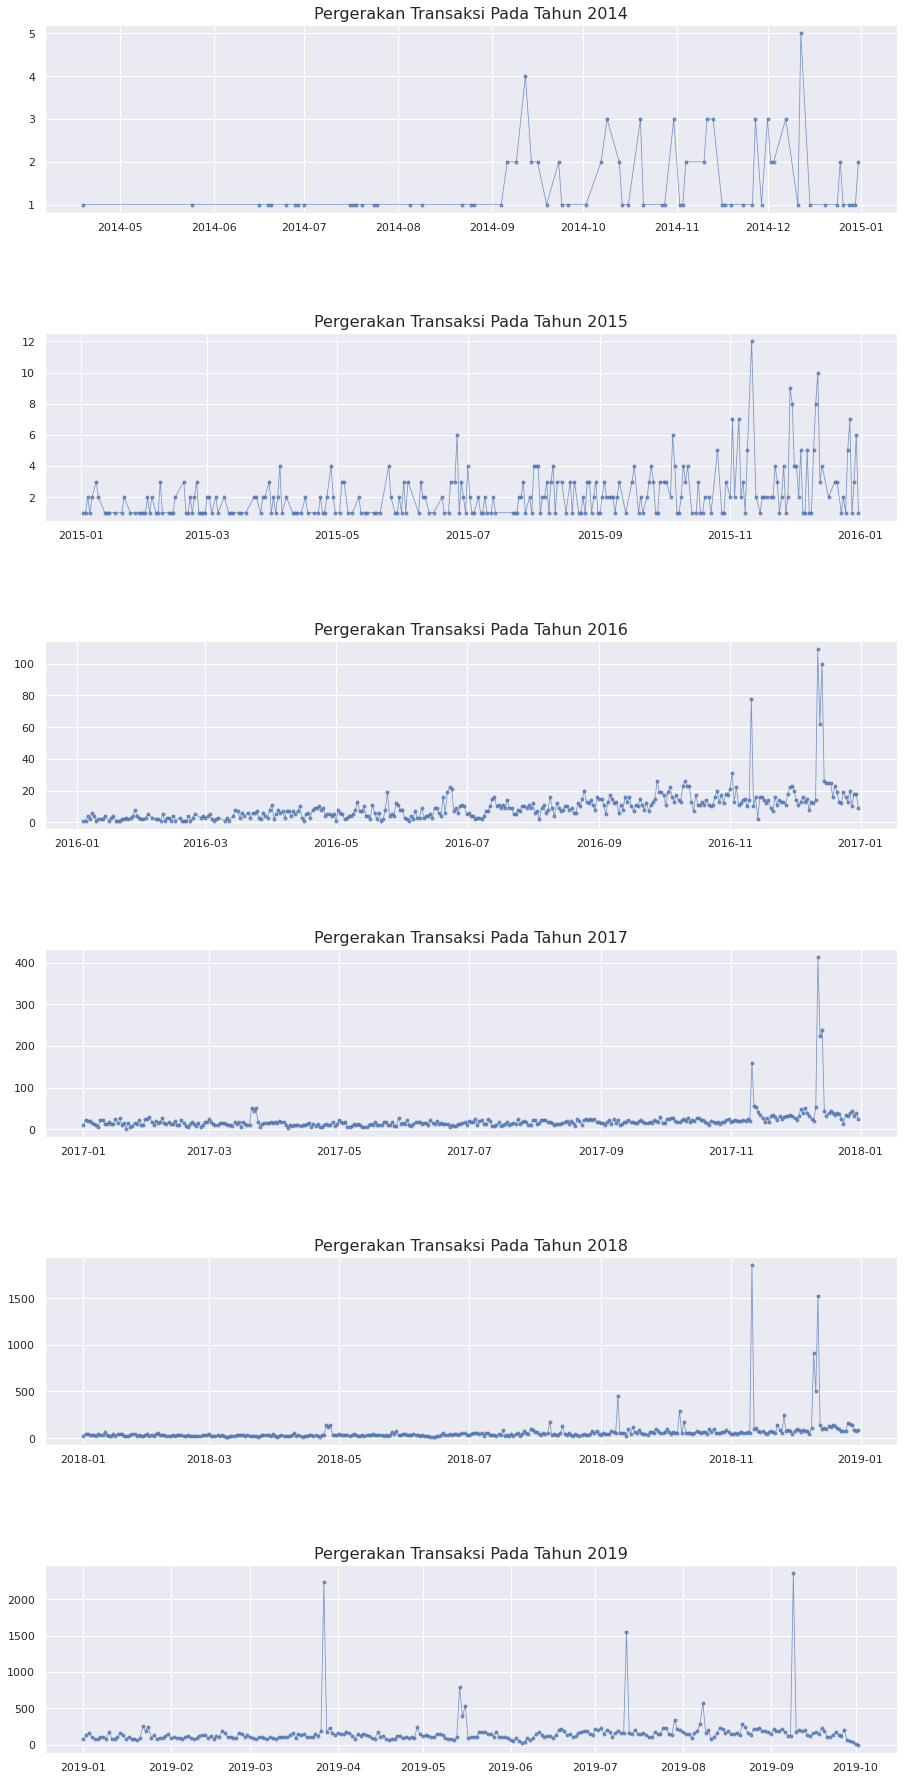

In [58]:
year_list = ['2014', '2015', '2016', '2017', '2018', '2019']

fig, ax = plt.subplots(6,1, figsize = (15, 27))
fig.tight_layout(pad = 8)

for axis, i in zip(ax.flatten(), year_list):
        axis.plot(df_resampled.loc[i, 'count'], linewidth = 0.8, marker = '.', alpha = 0.7)
        axis.set_title('Pergerakan Transaksi Pada Tahun {}'.format(i), size = 16)
        axis.set_xlabel('')
        axis.set_ylabel('')

plt.show()
